In [ ]:
import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/RFMC/final_basket_out.new.csv'
df_basket= pd.read_csv(path)
df_basket.head(5)

In [ ]:
path = '/content/drive/My Drive/RFMC/order_rs.csv'
df_order= pd.read_csv(path)
df_order.head(5)

,rs_id,order_id_
0,4,6723
1,4,6724
2,4,6725
3,4,6726
4,4,6727


In [ ]:
df_basket_order=pd.merge(df_basket,df_order)
df_basket_order.head(5)

,line_item,item_id,date_time,sale_quantity,sale_amount,return_quantity,return_amount,customer_id,order_id_,rs_id
0,1,1069846,2019-03-22 18:13:52.920,1.00,50.13,0.0,0.0,-1,6723,4
1,2,961809069,2019-03-22 18:13:52.920,0.49,49.92,0.0,0.0,-1,6723,4
2,3,961809068,2019-03-22 18:13:52.920,0.50,45.57,0.0,0.0,-1,6723,4
3,4,888306256,2019-03-22 18:13:52.920,1.00,38.84,0.0,0.0,-1,6723,4
4,5,1085156,2019-03-22 18:13:52.920,1.00,51.75,0.0,0.0,-1,6723,4


Remove missing customers

In [ ]:
print(df_basket_order.shape)
df_basket_order=df_basket_order.loc[df_basket_order['customer_id']!=-1]
print(df_basket_order.shape)

(6548097, 10)
(2917430, 10)


Convert column to date_time

In [ ]:
df_basket_order.info()
df_basket_order['date_time']=pd.to_datetime(df_basket_order['date_time'])
df_basket_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917430 entries, 169212 to 6548094
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   line_item        int64  
 1   item_id          int64  
 2   date_time        object 
 3   sale_quantity    float64
 4   sale_amount      float64
 5   return_quantity  float64
 6   return_amount    float64
 7   customer_id      int64  
 8   order_id_        int64  
 9   rs_id            int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 244.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917430 entries, 169212 to 6548094
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   line_item        int64         
 1   item_id          int64         
 2   date_time        datetime64[ns]
 3   sale_quantity    float64       
 4   sale_amount      float64       
 5   return_quantity  float64       
 6   return_amount    float64       
 7   cu

In [ ]:
print(df_basket_order.shape)
df_basket_order= df_basket_order.drop_duplicates()
print(df_basket_order.shape)

(2917430, 10)
(2917430, 10)


Applying first strategy

In [ ]:
number_duplicate_rows=0
for index, row in df_basket_order.iterrows():
   if((row['sale_quantity']==0) & (row['sale_amount']==0)):

     duplicate_row=df_basket_order.loc[(df_basket_order['customer_id']==row['customer_id'])& (df_basket_order['item_id']==row['item_id'])&(df_basket_order['sale_quantity']==row['return_quantity'])&(df_basket_order['sale_amount']==row['return_amount'])]


     if not duplicate_row.empty:

       df_basket_order.drop(index, inplace=True)
       df_basket_order.drop(duplicate_row.index, inplace=True)
       number_duplicate_rows=number_duplicate_rows+1
       print(number_duplicate_rows)
df_basket_order.to_csv('/content/drive/My Drive/RFMC/clean_basket_out.csv')
print("ultimate shape: ",df_basket_order.shape)

In [ ]:
df_basket_order=pd.read_csv("/content/drive/My Drive/RFMC/clean_basket_out.csv")

Applying second strategy

In [ ]:
number_duplicate_rows=0
for index, row in df_basket_order.iterrows():
   if((row['sale_quantity']==0) & (row['sale_amount']==0)):

     duplicate_row=df_basket_order.loc[(df_basket_order['customer_id']==row['customer_id'])&
                                       (df_basket_order['item_id']==row['item_id'])&
                                       (df_basket_order['sale_quantity']==row['return_quantity'])&
                                       (df_basket_order['sale_amount']!=row['return_amount'])]


     if not duplicate_row.empty:

       df_basket_order.drop(index, inplace=True)
       df_basket_order.drop(duplicate_row.index, inplace=True)
       number_duplicate_rows=number_duplicate_rows+1
       print(number_duplicate_rows)
df_basket_order.to_csv('/content/drive/My Drive/RFMC/clean_basket_out_2.csv')
print("ultimate shape: ",df_basket_order.shape)

In [ ]:
df_basket_order=pd.read_csv("/content/drive/My Drive/RFMC/clean_basket_out_2.csv")

Applying third strategy

In [ ]:
print("before shape: ",df_basket_order.shape)
number_duplicate_rows=0
for index, row in df_basket_order.iterrows():
   if((row['sale_quantity']==0) & (row['sale_amount']==0)):

     duplicate_row=df_basket_order.loc[(df_basket_order['customer_id']==row['customer_id'])&
                                       (df_basket_order['item_id']==row['item_id'])&
                                       (df_basket_order['sale_quantity']!=row['return_quantity'])&
                                       (df_basket_order['sale_amount']!=row['return_amount'])&
                                       (df_basket_order['sale_quantity']!=0)&(df_basket_order['sale_amount']!=0)]


     if not duplicate_row.empty:


       df_basket_order.loc[duplicate_row.index, 'sale_amount'] =abs( duplicate_row['sale_amount']-row['return_amount'])

       df_basket_order.loc[duplicate_row.index, 'sale_quantity'] =abs(duplicate_row['sale_quantity']-row['return_quantity'])



       df_basket_order.drop(index, inplace=True)

       number_duplicate_rows=number_duplicate_rows+1
       print(number_duplicate_rows)
df_basket_order.to_csv('/content/drive/My Drive/RFMC/clean_basket_out_3.csv')
print("ultimate shape: ",df_basket_order.shape)

In [ ]:
df_basket_order.describe()

## *start from here*

In [ ]:
df_basket_order=pd.read_csv("/content/drive/My Drive/RFMC/clean_basket_out_3.csv")

# There are 1091 rows that ther are no related returned row in dataset:  removed them.

In [ ]:
df_basket_order= df_basket_order[(df_basket_order['sale_quantity']!=0)&(df_basket_order['sale_amount']!=0)]
df_basket_order.shape

(2910175, 13)

In [ ]:
df_basket_order['date_time']=pd.to_datetime(df_basket_order['date_time'])
df_basket_order['date_time'].max()
now =dt.datetime(2020,3,19)

In [ ]:
rfm = df_basket_order.groupby('customer_id').agg({'date_time': lambda x: (now - x.max()).days,
                               'order_id_': lambda num : len(num),
                              'sale_amount': lambda price : price.sum()
                             })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
print(rfm)

In [ ]:
r=df_basket_order.groupby([df_basket_order['customer_id'],df_basket_order['date_time'].dt.month])['date_time'].count()
df =pd.DataFrame(r)

print(df)
print(type(df))

Calculation of C

In [ ]:
c= []
for index, row in rfm.iterrows():
  c.append(r[index].count())

rfm['C'] = c
print(rfm.head(20))

             Recency  Frequency  Monetary  C
customer_id                                 
1                  1         34   1279.09  1
9                  1         39   1443.55  1
10               237         44   1362.60  1
18               227          8    224.01  1
23               197         19    585.99  1
26               231          9    346.35  1
28               117         18    675.05  1
30                85         11    406.14  1
48               113         18    582.00  1
55               209          7    199.07  2
84               182          2     67.63  1
93                85        157   6166.50  3
100              207         19    722.98  1
111               46          1    108.02  1
114              220          9    297.16  1
129              206         26    985.15  1
134              207         19    534.59  1
138              177         14    476.22  1
139              266          7    257.68  1
166              119         26    902.62  1


In [ ]:

newrfm=rfm.copy()

In [ ]:
newrfm.describe()

In [ ]:
from pandas.io.formats.format import DataFrameRenderer

import warnings
import seaborn as sns
sns.boxplot(x=newrfm['Frequency'])
plt.show()
sns.boxplot(x=newrfm['Monetary'])
plt.show()
sns.boxplot(x=newrfm['C'])
plt.show()
sns.boxplot(x=newrfm['Recency'])
plt.show()

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(newrfm['Recency'])
plt.subplot(1,3,2)
sns.distplot(newrfm['Frequency'])
plt.subplot(1,3,3)
sns.distplot(newrfm['Monetary'])
plt.show()

plt.hist(newrfm.Frequency,bins=[0,10,20,30,40,50,100,200,300,362])
plt.show()
plt.hist(newrfm.Recency)
plt.show()
plt.hist(newrfm.Monetary)
plt.show()

# Clustering Whitout Outlier detection

Clustering evaluation using Elbow method

In [ ]:
scaler = StandardScaler()

customers_normalized = scaler.fit_transform(newrfm)

In [ ]:
!pip install yellowbrick

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(customers_normalized)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_normalized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(customers_normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_normalized, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(
    #    customers_normalized['Recency'], customers_normalized['Monetary'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #)



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
import collections
import math


def estimate_shannon_entropy(dna_sequence):

 m = len(dna_sequence)

 bases = collections.Counter([tmp_base for tmp_base in dna_sequence])



 shannon_entropy_value = 0

 for base in bases:

   n_i = bases[base]

   p_i = n_i / float(m)

   entropy_i = p_i * (math.log(p_i, 2))

   shannon_entropy_value += entropy_i



 return shannon_entropy_value * -1



For Non-normal run this cell

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(newrfm)
centroids  = clusterer.cluster_centers_
centroids
newrfm['label']=cluster_labels
newrfm['label'].value_counts()

cluster_0=newrfm[cluster_labels == 0]
cluster_1=newrfm[cluster_labels == 1]
cluster_2=newrfm[cluster_labels == 2]
cluster_3=newrfm[cluster_labels == 3]

For normal run this cell

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(customers_normalized)
centroids  = clusterer.cluster_centers_
centroids
newrfm['label']=cluster_labels
newrfm['label'].value_counts()

cluster_0=customers_normalized[cluster_labels == 0]
cluster_1=customers_normalized[cluster_labels == 1]
cluster_2=customers_normalized[cluster_labels == 2]
cluster_3=customers_normalized[cluster_labels == 3]

cluster_0 = pd.DataFrame(data=cluster_0, columns=['Recency', 'Frequency','Monetary','C'])
cluster_1 = pd.DataFrame(data=cluster_1, columns=['Recency', 'Frequency','Monetary','C'])
cluster_2 = pd.DataFrame(data=cluster_2, columns=['Recency', 'Frequency','Monetary','C'])
cluster_3 = pd.DataFrame(data=cluster_3, columns=['Recency', 'Frequency','Monetary','C'])

CLV1

In [ ]:
R_0=centroids[0][0]
print(R_0)
F_0=centroids[0][1]
print(F_0)
M_0=centroids[0][2]
print(M_0)
C_0=centroids[0][3]
print(C_0)

WR_0=estimate_shannon_entropy(cluster_0['Recency'])
print(WR_0)
WF_0=estimate_shannon_entropy(cluster_0['Frequency'])
print(WF_0)
WM_0=estimate_shannon_entropy(cluster_0['Monetary'])
print(WM_0)
WC_0=estimate_shannon_entropy(cluster_0['C'])
print(WC_0)

CLV0=R_0 * WR_0 + F_0* WF_0 + M_0 * WM_0 + C_0* WC_0
print(CLV0)

1.0142286669177676
-0.32677349512822057
-0.3345837285332415
-0.4025623957468086
7.287649249638175
5.424895601657777
14.90202727138797
0.6650157265465639
0.3649445157124489


In [ ]:
R_1=centroids[1][0]
print(R_1)
F_1=centroids[1][1]
print(F_1)
M_1=centroids[1][2]
print(M_1)
C_1=centroids[1][3]
print(C_1)

WR_1=estimate_shannon_entropy(cluster_1['Recency'])
print(WR_1)
WF_1=estimate_shannon_entropy(cluster_1['Frequency'])
print(WF_1)
WM_1=estimate_shannon_entropy(cluster_1['Monetary'])
print(WM_1)
WC_1=estimate_shannon_entropy(cluster_1['C'])
print(WC_1)

CLV1=R_1 * WR_1 + F_1* WF_1 + M_1 * WM_1 + C_1* WC_1
print(CLV1)

-0.6740476951561695
-0.217213124898333
-0.21450858923386779
-0.2434322009528827
7.092827364784939
5.786277586355664
15.13870835332994
1.2388541025269757
-9.586719325968819


In [ ]:
R_2=centroids[2][0]
print(R_2)
F_2=centroids[2][1]
print(F_2)
M_2=centroids[2][2]
print(M_2)
C_2=centroids[2][3]
print(C_2)

WR_2=estimate_shannon_entropy(cluster_2['Recency'])
print(WR_2)
WF_2=estimate_shannon_entropy(cluster_2['Frequency'])
print(WF_2)
WM_2=estimate_shannon_entropy(cluster_2['Monetary'])
print(WM_2)
WC_2=estimate_shannon_entropy(cluster_2['C'])
print(WC_2)

CLV2=R_2 * WR_2 + F_2* WF_2 + M_2 * WM_2 + C_2* WC_2
print(CLV2)

-1.1328630421001638
4.957016305145358
4.929797372529945
3.846397376712711
5.954103346381033
8.00036241973498
10.870067378584187
2.9335313562196528
97.78350024697403


In [ ]:
R_3=centroids[3][0]
print(R_3)
F_3=centroids[3][1]
print(F_3)
M_3=centroids[3][2]
print(M_3)
C_3=centroids[3][3]
print(C_3)

WR_3=estimate_shannon_entropy(cluster_3['Recency'])
print(WR_3)
WF_3=estimate_shannon_entropy(cluster_3['Frequency'])
print(WF_3)
WM_3=estimate_shannon_entropy(cluster_3['Monetary'])
print(WM_3)
WC_3=estimate_shannon_entropy(cluster_3['C'])
print(WC_3)

CLV3=R_3 * WR_3 + F_3* WF_3 + M_3 * WM_3 + C_3* WC_3
print(CLV3)

-0.846776189901893
1.1777156430354523
1.201179048358617
1.7795747055769437
7.008864619367775
7.151746862742831
13.26376737803399
2.7107741748883245
23.24396910831494


# Clustering after removing Outliers

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(newrfm['Monetary'])


print('number of outliers:'+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers:7982
max outlier value: 49124.33
min outlier value: 2744.4300000000003


In [ ]:
cols = ['Frequency', 'Monetary'] # one or more

Q1 = newrfm[cols].quantile(0.25)
Q3 = newrfm[cols].quantile(0.75)
IQR = Q3 - Q1

df = newrfm[~((newrfm[cols] < (Q1 - 1.5 * IQR)) |(newrfm[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df)

80768

In [ ]:
newrfm=df.copy()

In [ ]:
newrfm.describe()

,Recency,Frequency,Monetary,C
count,80768.000000,80768.000000,80768.000000,80768.000000
mean,135.733682,20.719035,753.342237,1.448061
std,91.133960,16.496840,587.328463,0.946330
min,-1.000000,1.000000,3.140000,1.000000
25%,56.000000,8.000000,315.877500,1.000000
50%,128.000000,16.000000,568.840000,1.000000
75%,208.000000,29.000000,1043.267500,2.000000
max,362.000000,76.000000,2744.290000,10.000000


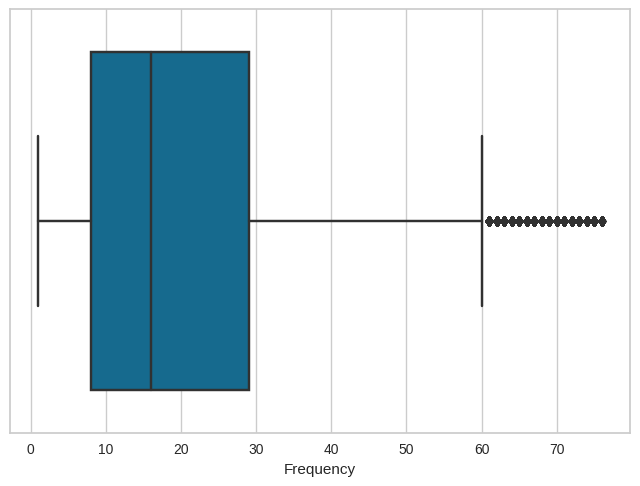

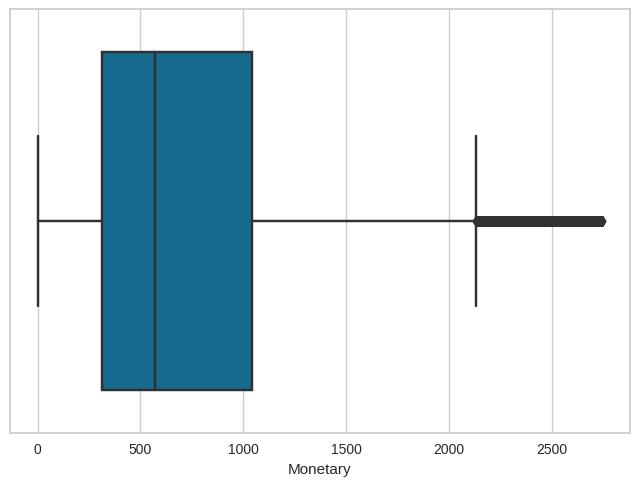

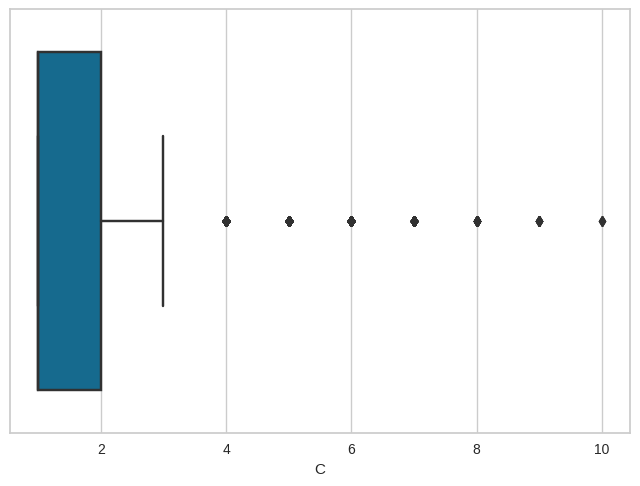

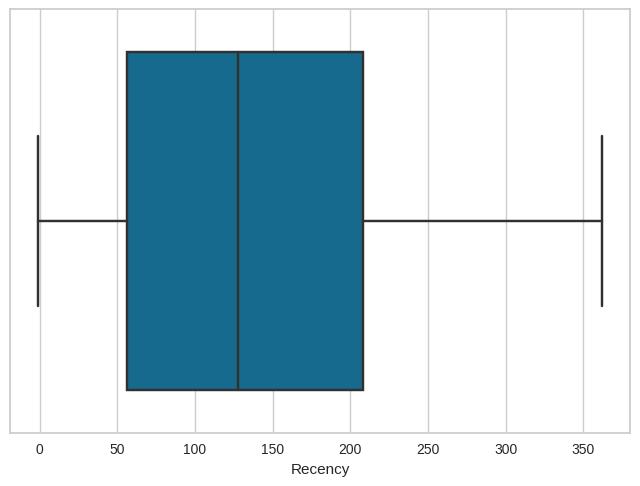

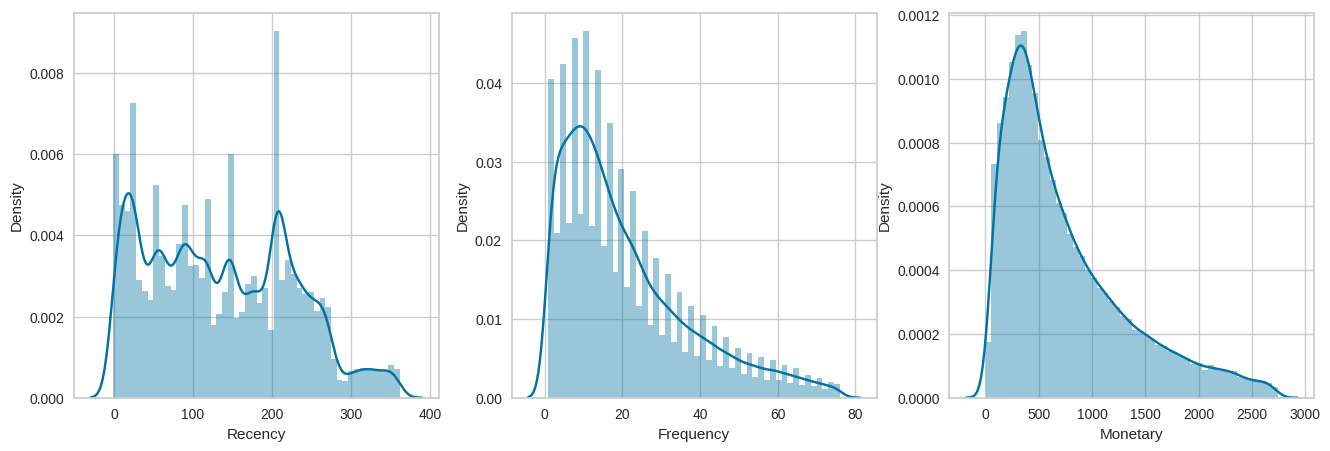

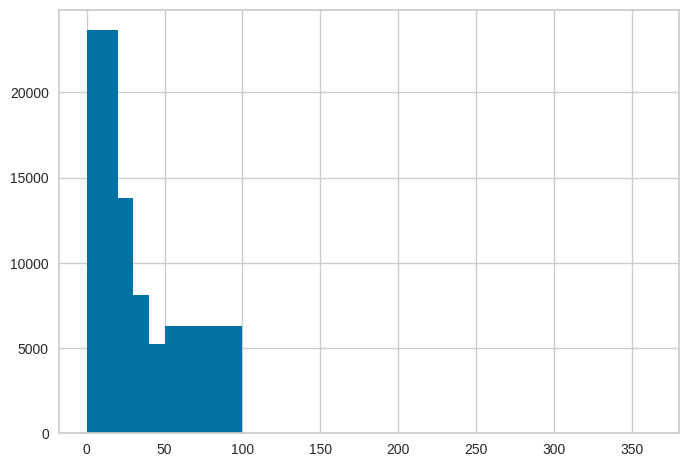

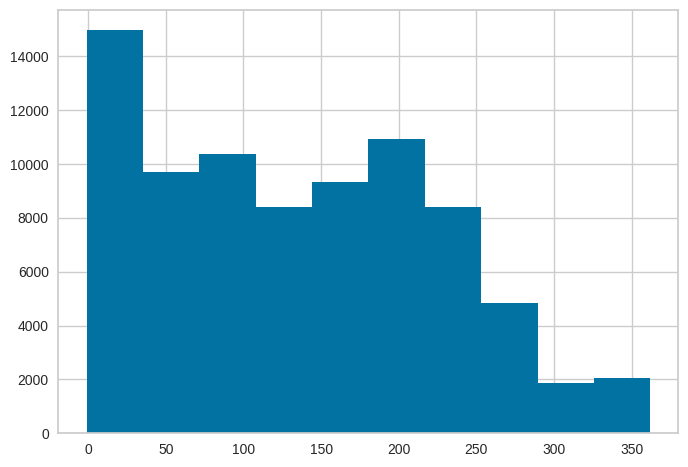

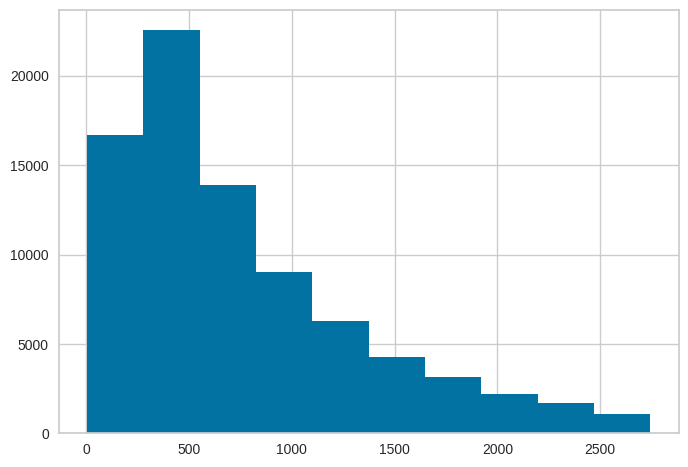

In [ ]:
from pandas.io.formats.format import DataFrameRenderer

import warnings
import seaborn as sns
sns.boxplot(x=df['Frequency'])
plt.show()
sns.boxplot(x=df['Monetary'])
plt.show()
sns.boxplot(x=df['C'])
plt.show()
sns.boxplot(x=df['Recency'])
plt.show()

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['Recency'])
plt.subplot(1,3,2)
sns.distplot(df['Frequency'])
plt.subplot(1,3,3)
sns.distplot(df['Monetary'])
plt.show()

plt.hist(df.Frequency,bins=[0,10,20,30,40,50,100,200,300,362])
plt.show()
plt.hist(df.Recency)
plt.show()
plt.hist(df.Monetary)
plt.show()

In [ ]:
scaler = StandardScaler()

customers_normalized = scaler.fit_transform(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


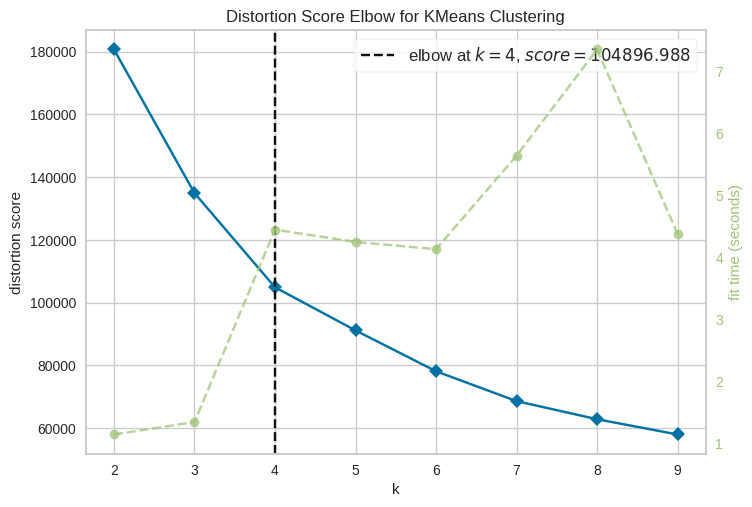

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
!pip install yellowbrick

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(customers_normalized)        # Fit the data to the visualizer
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.47648951909223086
For n_clusters = 3 The average silhouette_score is : 0.34237951344851786
For n_clusters = 4 The average silhouette_score is : 0.3535627760860568
For n_clusters = 5 The average silhouette_score is : 0.34497369763750146
For n_clusters = 6 The average silhouette_score is : 0.3458972189596514


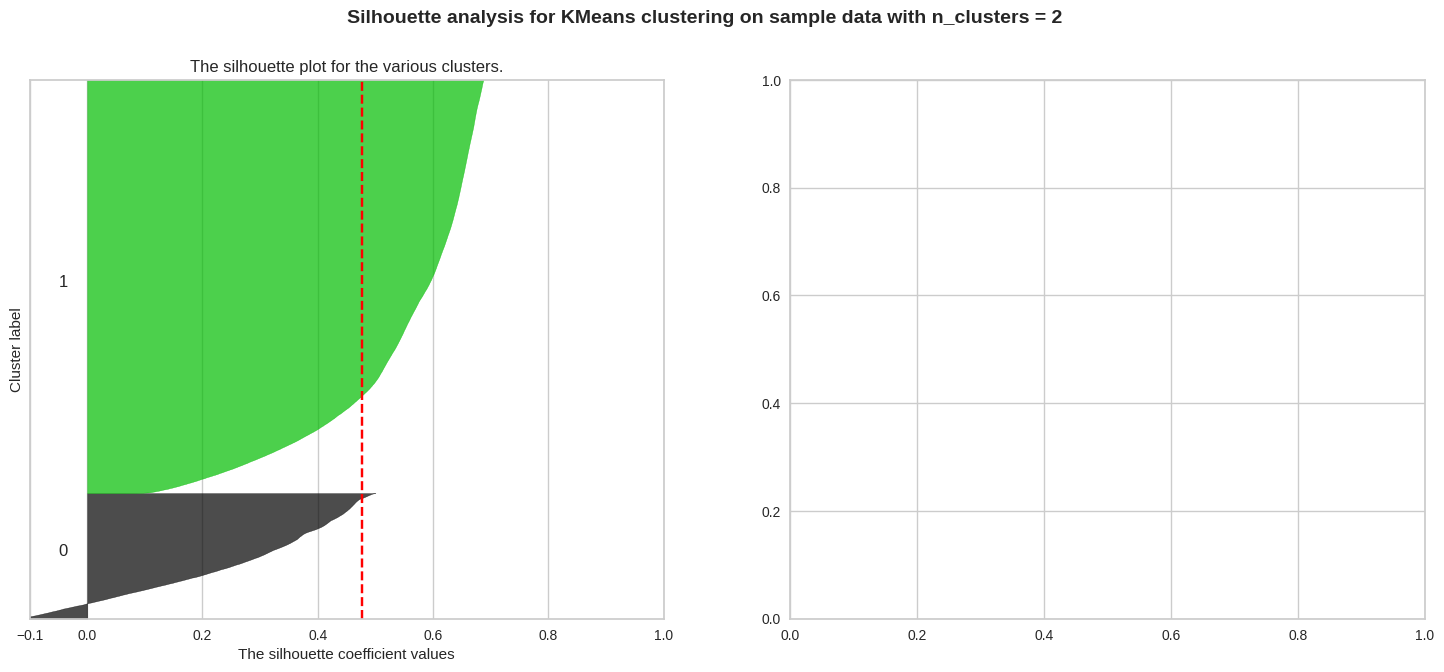

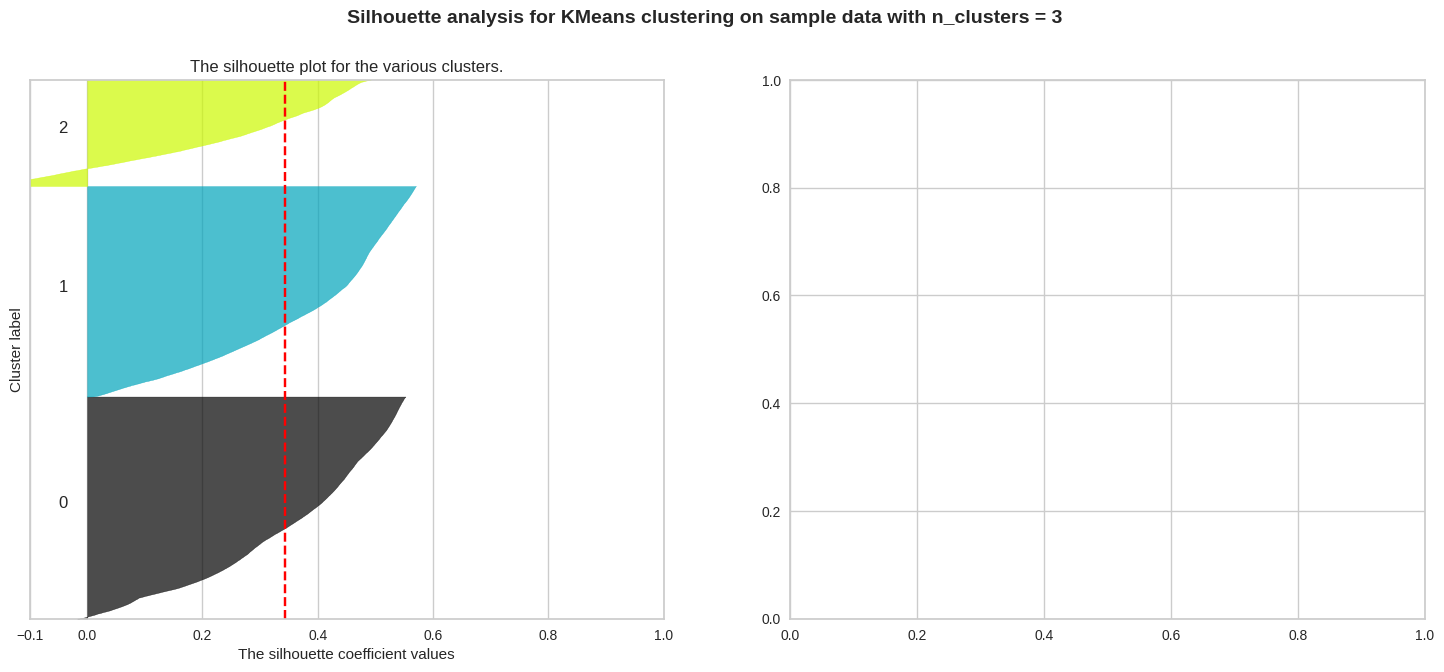

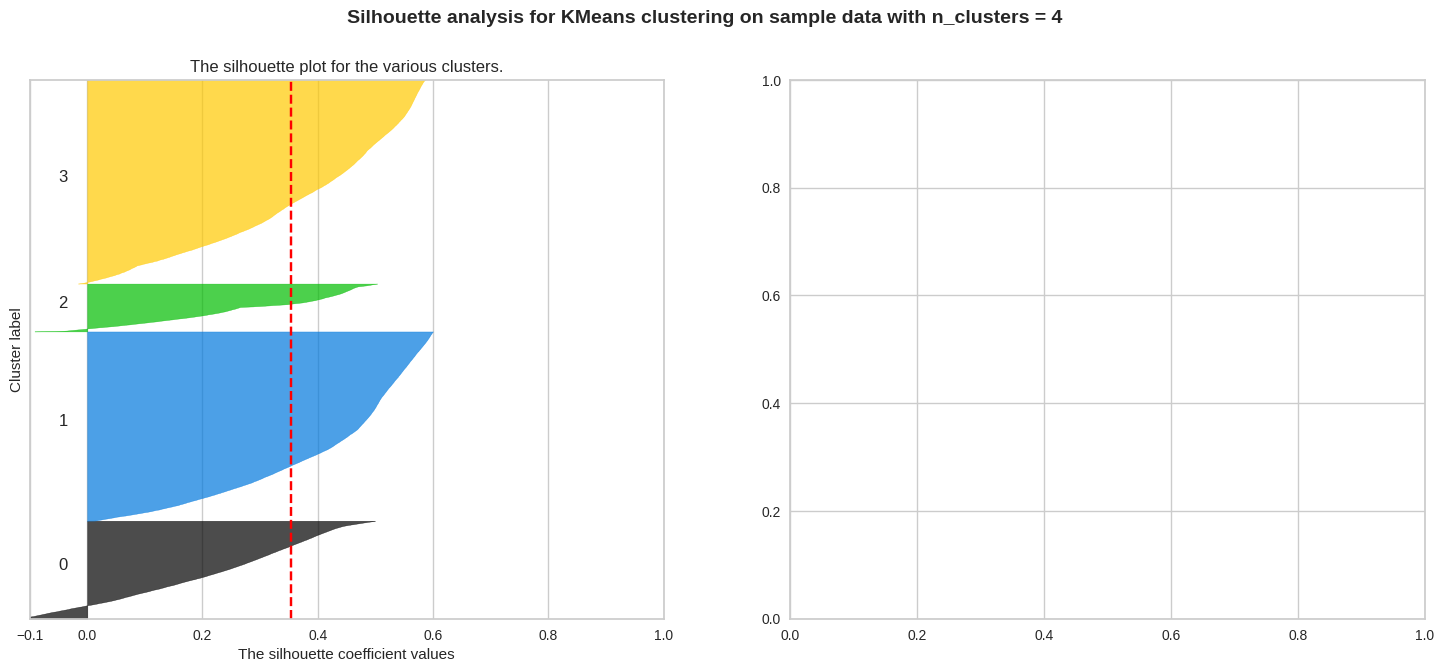

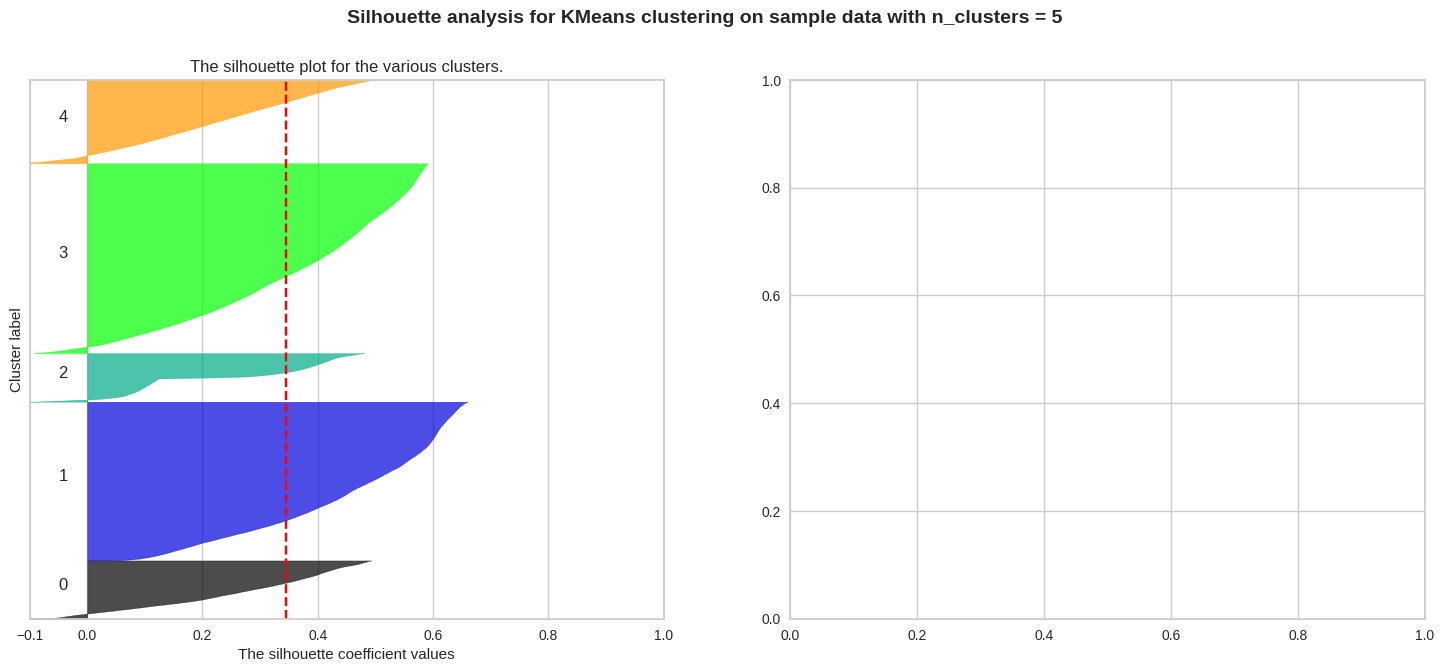

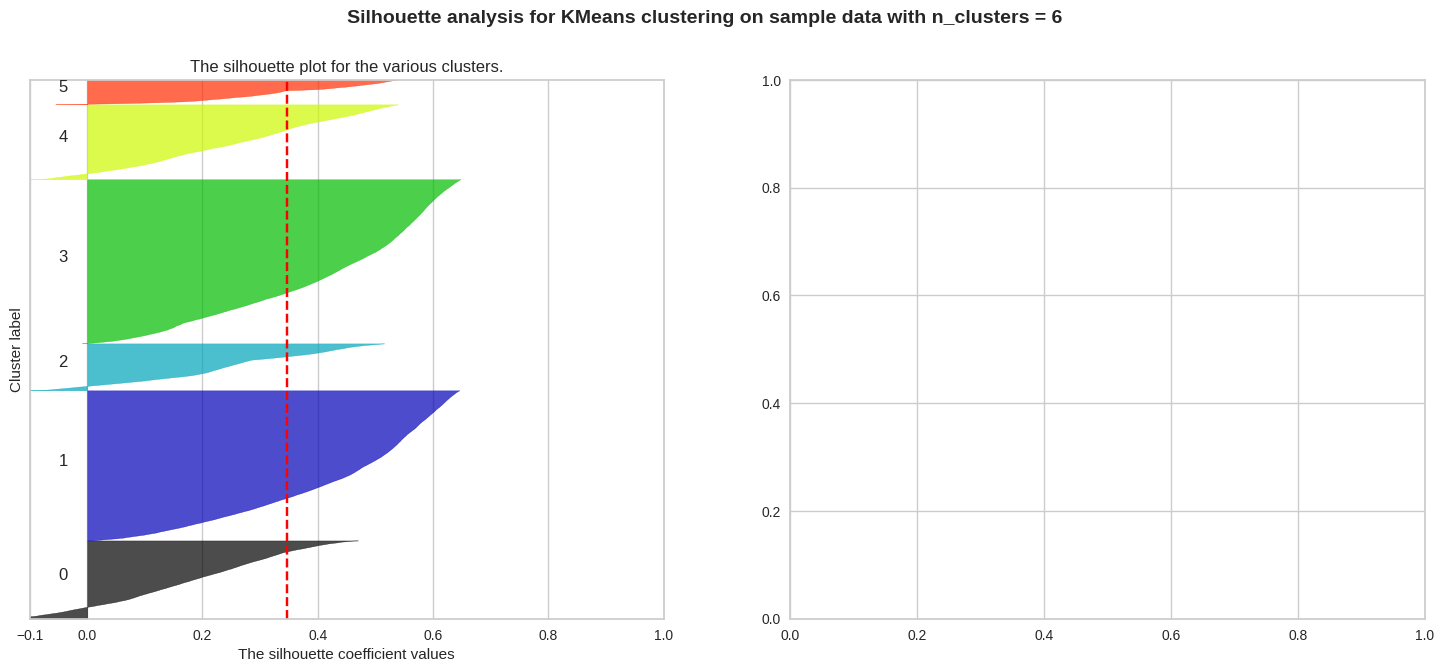

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_normalized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(customers_normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_normalized, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(
    #    customers_normalized['Recency'], customers_normalized['Monetary'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #)



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()